### 30. 形態素解析結果の読み込み
形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．ただし，各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納し，1文を形態素（マッピング型）のリストとして表現せよ．第4章の残りの問題では，ここで作ったプログラムを活用せよ．

In [1]:
import re
lst = []
for line in open('data/neko.txt.mecab'):
    x = re.search('(?P<surface>.*?)\t(?P<pos>[^,]*),(?P<pos1>[^,]*),[^,]*,[^,]*,[^,]*,[^,]*,(?P<base>[^,]*),.*',line)
    if x:
        mp = {'surface':x.group('surface'), 'base':x.group('base'), 'pos':x.group('pos'), 'pos1':x.group('pos1')}
        lst.append(mp)
lst[:10]

[{'surface': '一', 'base': '一', 'pos': '名詞', 'pos1': '数'},
 {'surface': '\u3000', 'base': '\u3000', 'pos': '記号', 'pos1': '空白'},
 {'surface': '吾輩', 'base': '吾輩', 'pos': '名詞', 'pos1': '代名詞'},
 {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'},
 {'surface': '猫', 'base': '猫', 'pos': '名詞', 'pos1': '一般'},
 {'surface': 'で', 'base': 'だ', 'pos': '助動詞', 'pos1': '*'},
 {'surface': 'ある', 'base': 'ある', 'pos': '助動詞', 'pos1': '*'},
 {'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'},
 {'surface': '名前', 'base': '名前', 'pos': '名詞', 'pos1': '一般'},
 {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'}]

### 31. 動詞
動詞の表層形をすべて抽出せよ．

In [2]:
set31 = set([i['surface'] for i  in lst if i['pos'] == '動詞'])

### 32. 動詞の原形
動詞の原形をすべて抽出せよ．

In [3]:
set32 = set([i['base'] for i  in lst if i['pos'] == '動詞'])

### 33. サ変名詞
サ変接続の名詞をすべて抽出せよ．

In [4]:
set33 = set([i['base'] for i  in lst if i['pos1'] == 'サ変接続'])

### 34. 「AのB」
2つの名詞が「の」で連結されている名詞句を抽出せよ．

In [5]:
set34 = set([lst[i]['base']+'の'+lst[i+2]['base'] for i  in range(len(lst)-2) \
             if lst[i]['pos'] == '名詞' and lst[i+1]['base'] == 'の' and lst[i]['pos'] == '名詞'])

### 35. 名詞の連接
名詞の連接（連続して出現する名詞）を最長一致で抽出せよ．

In [6]:
flag = False
txt = ''
set35=set([])
for i in lst:
    if i['pos'] == '名詞':
        flag = True
        txt = txt+i['surface']
    if flag and i['pos'] != '名詞':
        flag = False
        set35.add(txt)
        txt=''
#print(set35)
longest = ''
for i in set35:
    if len(i) > len(longest):
        longest = i
longest

'猫誉信女南無阿弥陀仏南無阿弥陀仏'

### 36. 単語の出現頻度
文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ．

In [7]:
map36 = {}
for i in lst:
    if i['base'] in map36.keys():
        map36[i['base']] = map36[i['base']] + 1
    else:
        map36.update({i['base']:1})
lst36 = sorted([[i,map36[i]] for i in map36], key = lambda data: data[1], reverse=True)
lst36[:10]

[['の', 9194],
 ['。', 7486],
 ['て', 6848],
 ['、', 6772],
 ['は', 6420],
 ['に', 6243],
 ['を', 6071],
 ['だ', 5975],
 ['と', 5508],
 ['が', 5337]]

In [8]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = 'AppleGothic'

### 37. 頻度上位10語
出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

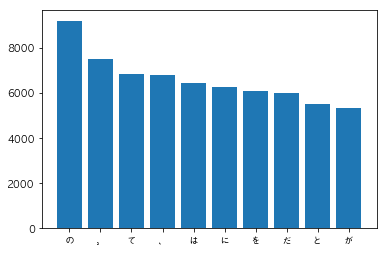

In [9]:
plt.bar([i[0] for i in lst36[:10]],[i[1] for i in lst36[:10]])
plt.show()

### 38. ヒストグラム
単語の出現頻度のヒストグラム（横軸に出現頻度，縦軸に出現頻度をとる単語の種類数を棒グラフで表したもの）を描け．

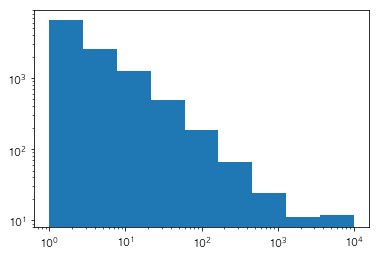

In [17]:
import numpy as np
plt.hist([i[1] for i in lst36],bins = np.logspace(0,4,10))
plt.xscale("log")
plt.yscale("log")
plt.show()

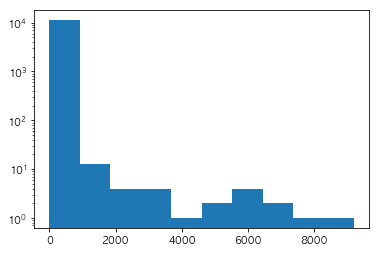

In [18]:
import numpy as np
plt.hist([i[1] for i in lst36], log=True)
plt.show()

### 39. Zipfの法則
単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ．

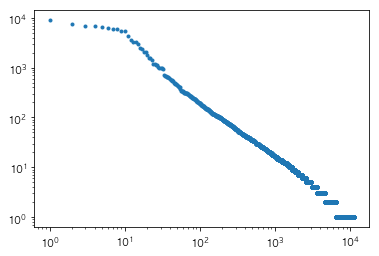

In [32]:
plt.scatter(range(1,len(lst36)+1), [i[1] for i in lst36], marker='.')
plt.xscale('log')
plt.yscale('log')
plt.show()